In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [108]:
theta = np.pi
psi = np.pi / 2

In [109]:
def gen_start_end(theta, psi):
    start_x, start_y = -np.cos(theta), -np.sin(theta)
    end_x = np.cos(theta) + np.cos(theta + psi)
    end_y = np.sin(theta) + np.sin(theta + psi)
    return start_x, start_y, end_x, end_y


In [110]:
start_x, start_y, end_x, end_y = gen_start_end(theta, psi)

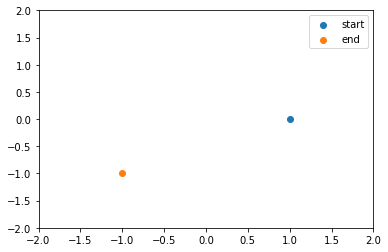

In [111]:
plt.scatter(start_x, start_y, label='start')
plt.scatter(end_x, end_y, label='end')
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.legend()

In [135]:
thetas = np.array([0,np.pi/2, np.pi])

In [61]:
-np.sin(thetas)

array([-0.0000000e+00, -1.0000000e+00, -1.2246468e-16])

In [139]:
n_act = 100
n_episodes = 100
psis = np.random.uniform(-np.pi / 2, np.pi / 2, n_episodes)

X_all = np.zeros((n_episodes, n_act, 2))
Y_all = np.zeros((n_episodes, n_act, 2))

for i, psi in enumerate(psis):
    thetas = np.random.uniform(0, 2 * np.pi, n_act)
    start_x, start_y, end_x, end_y = gen_start_end(thetas, psi)
    
    X_all[i] = np.stack([start_x, start_y], axis=1)
    Y_all[i] = np.stack([end_x, end_y], axis=1)

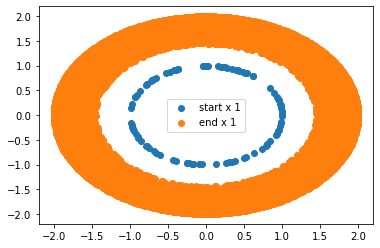

In [143]:
plt.scatter(X_all[1, :, 0], X_all[1, :, 1], label='start x 1')
plt.scatter(Y_all[:, :, 0], Y_all[:, :, 1], label='end x 1')
# plt.scatter(Y_all[2, :, 0], Y_all[2, :, 1], label='end x 2')

plt.legend()

In [141]:
psis

array([ 0.51208558, -0.72035332,  0.06373412, -0.067584  , -1.5241604 ,
       -0.79270492, -0.28525985,  0.17383806, -1.41428644,  0.47996737,
       -0.88043603,  1.19663471,  0.34054767,  0.29569751,  0.84811897,
        0.21104198, -0.21319474,  1.0385463 ,  0.94018458,  0.24389841,
        0.79237161,  0.08068673, -0.82601915, -1.37814609,  0.45909404,
       -1.49296334, -1.00848049,  1.13287041,  0.42461187, -0.35819852,
       -1.28073573,  0.59152633,  1.46633912, -1.51498283, -0.05179373,
        1.12894342,  0.14306004,  0.94722763, -0.185348  , -0.40738905,
        1.39656262, -0.22060307, -1.38242216,  0.50768757,  1.35382027,
       -0.65316506, -1.02644184,  0.30090569,  1.04662112,  0.66477656,
        1.36232576,  0.32891948, -0.22252703,  0.27450314, -1.01899497,
        0.07736574,  0.95124645,  0.09715947,  1.46995961, -0.68292878,
        0.3253116 , -1.23979588, -1.27887638,  0.250655  ,  1.11528987,
       -1.33253507,  0.4564033 , -0.2540958 ,  0.0565389 ,  0.21

In [144]:
data = dict(X=X_all, Y=Y_all, psi=psis)
with open('/data/varyingsim/datasets/toy.pickle', 'wb') as f:
    pickle.dump(data, f)